In this second notebook, I compare several models and  evaluate their performance on our dataset.

In [0]:
import pandas as pd

X_train = pd.read_csv('/content/Knight_X_train.csv')
X_valid= pd.read_csv('/content/Knight_X_valid.csv')
y_train = pd.read_csv('/content/Knight_y_train.csv')
y_valid= pd.read_csv('/content/Knight_y_valid.csv')
X_test = pd.read_csv('/content/Knight_X_test.csv')
X= pd.read_csv('/content/Knight_X.csv')
y= pd.read_csv('/content/Knight_y.csv')

In [0]:
import numpy as np
X_train= np.array(X_train)
y_train= np.array(y_train)
X_valid= np.array(X_valid)
y_valid= np.array(y_valid)
X_test = np.array(X_test)
X = np.array(X)
y = np.array(y)

In [0]:
y_train = y_train.flatten()
y_valid= y_valid.flatten()
y= y.flatten()

In [0]:
y_train.shape

(66125,)

In [0]:
X_train.shape

(66125, 78)

In [0]:
X_valid.shape

(16532, 78)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
from sklearn.svm import SVC
svc= SVC()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100)
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(solver= 'liblinear')
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
from xgboost import XGBClassifier
xgb= XGBClassifier()

models= {'KNN':knn,'SVC':svc ,'Random Forest':rfc,'Logistic regression':clf ,
        'Naive Bayes':mnb,'LDA':lda, 'XGBoost':xgb }

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

results=[]
for model in models:
    kfold= StratifiedKFold(n_splits=10, random_state= 42, shuffle= True)
    score= cross_val_score(models[model], X_train, y_train, 
                           cv= kfold, scoring= 'accuracy')
    results.append(score)
    print('%s: %f, (%f )'%(model,np.mean(results), np.std(results)))

KNN: 0.863380, (0.003782 )
SVC: 0.889444, (0.026283 )
Random Forest: 0.896998, (0.024013 )
Logistic regression: 0.900616, (0.021749 )
Naive Bayes: 0.898175, (0.020079 )
LDA: 0.892267, (0.022708 )
XGBoost: 0.895162, (0.022214 )


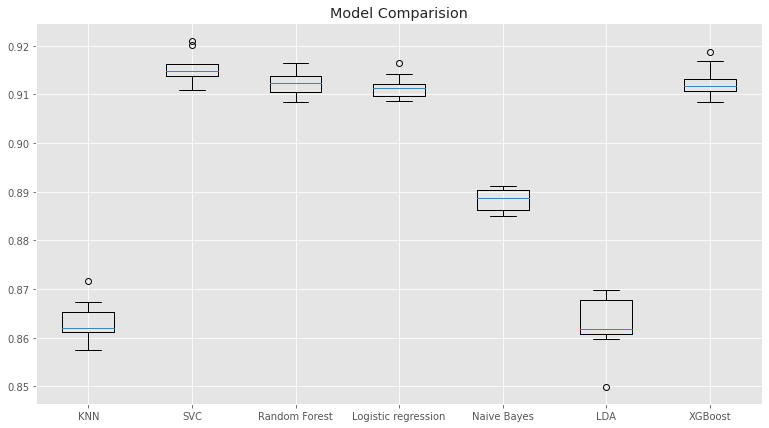

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
plt.style.use('ggplot')
plt.figure(figsize= (13,7))
plt.title('Model Comparision')
plt.boxplot(results, labels= models.keys())
plt.show()

In [0]:
xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_xgb, y_valid)

0.9096902976046455

In [0]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Evalute best model on test data

I shortlist both XGBoost and Logistic regression as good classifiers for our dataset. Naive Bayes is very close and has reputed to handle large number of target labels.

Although, PCA can be used to reduce the dimensions and shorten the computation time, but it doesn't improve the accuracy. 

We can perform hyper parameter tuning to improve the performance of our model. 

Now, I train my model on whole of training dataset and validate the model on test dataset.

In [0]:
y.shape


(82657,)

In [0]:
xgb.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [0]:
y_pred= xgb.predict(X_test)

In [0]:
y_pred.shape

(20665,)

## Convert labels back to label names.

In [0]:
train_variety= pd.read_csv('/content/Knight_train_variety.csv')

In [0]:
train_variety= np.array(train_variety)
train_variety= train_variety.flatten()

In [0]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [0]:
train_variety_transform= le.fit_transform(train_variety)

In [0]:
train_variety_transform

array([ 5, 17, 11, ...,  6,  0,  3])

In [0]:
le.inverse_transform(train_variety_transform)

array(['Chardonnay', 'Red Blend', 'Nebbiolo', ..., 'Gamay',
       'Bordeaux-style Red Blend', 'Cabernet Sauvignon'], dtype=object)

In [0]:
pred_values = le.inverse_transform(y_pred)

In [0]:
title_freq_words= ['château','red','bordeaux','blanc','franc','cabernet',
                   'sauvignon','champagne','brut','chardonnay','domaine',
                   'beaujolaisvillages','gewurztraminer','gewürztraminer',
                  'alsace','branco','verde','riesling','rosé','montalcino',
                   'sangiovese','chianti','syrah','rioja','ribera','zinfandel',
                  'veltliner','grüner','malbec','mendoza','merlot','barolo',
                   'barbaresco','nebbiolo','pinot','grigio','gris','noir',
                  'quinta','douro','alentejano','white','toscana','provence',
                   'brunello','marlborough','sparkling','cava','vineyard',
                   'tempranillo','valley','riserva','reserve','reserva']

In [0]:
description_freq_words=['zin','finish','apple', 'citrus','cherry','acidity',
                        'crisp','blend','fruit','ripe','pear','black',
                        'blackberry','berry','flavors','palate','aromas',
                        'tannins','spice','rich','oak','dry','fresh','soft']

In [0]:
col_name= title_freq_words+description_freq_words

In [0]:
test_label = pd.DataFrame(pred_values, columns= ['wine_variety'])

In [0]:
test_features= pd.DataFrame(X_test, columns=[col_name])

In [0]:
test_output = pd.concat([test_label,test_features], axis=1)

In [0]:
pd.DataFrame(test_output).to_csv('Knight_ML_Assignment_output.csv',index= False)